In [1]:
import pandas as pd
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
def normalize_dates(df, release_date, start=-2, end=10):
    '''
    Normalizes dates to release date, only keeping "start" days
    before to "end" days after. Returns a copy.

    :param df: input album dataframe
    :param release_date: album release date
    :param start: number of days before release date to keep
    :param end: number of days after release date to keep
    :return: album dataframe with normalized dates
    '''
    df = df.copy()
    df['date'] = pd.to_datetime(df['date'])
    date_diff = (pd.Timestamp(release_date) - df['date'].min())
    normalized_dates = (pd.factorize(df['date'], sort=True)[0] - date_diff.days).astype(object)
    
    # remove out of scope
    normalized_dates[(normalized_dates > end) | (normalized_dates < start)] = np.NaN
    df['normalized_dates'] = normalized_dates
    return df.dropna(subset=['normalized_dates'])

def plot_albums(title, outdir=None, *album_tups):
    '''
    Plots multiple albums as a single overlayed line plot with
    normalized dates

    :param title: Title of overlaid plot
    :outdir: output filepath for plot
    '''
    assert len(album_tups) > 1, 'passed in only one album'
    assert len(album_tups[0]) == 2, 'need to pass in both album and legend name'
    assert all(['normalized_dates' in album.columns for album, leg in album_tups])
    
    legend = []
    album, leg = album_tups[0]
    legend.append(leg)
    
    ax = album.groupby('normalized_dates').size().plot(figsize=(10,7), title=title)
    for album_tup in album_tups[1:]:
        album, leg = album_tup
        legend.append(leg)
        album.groupby('normalized_dates').size().plot(ax=ax)
        
    # release date line
    max_counts = album.normalized_dates.value_counts().max()
    ax.annotate('Album Release', xy = (0, np.mean([0, max_counts])), color='purple', alpha = 0.5)
    ax.axvline(0, color='purple', alpha=0.5)
    
    # legend
    ax.legend(legend)
    if outdir:
        ax.figure.savefig(os.path.join(outdir, title + '.png'))

In [3]:
# read and transform data

wanted = ['date', 'user_id', 'username', 'tweet', 'replies_count', 'retweets_count', 'likes_count', 'hashtags', 'retweet']
bts1 = pd.read_csv('../data/raw/bts/dark_wild.csv')[wanted]
taylor1 = pd.read_csv('../data/raw/taylor/nine_all.csv')[wanted]
justin1 = pd.read_csv('../data/raw/justin/believe_all.csv')[wanted]

norm_bts1 = normalize_dates(bts1, '2014-08-19')
norm_taylor1 = normalize_dates(taylor1, '2014-10-27')
norm_justin1 = normalize_dates(justin1, '2012-06-15')

bts2 = pd.read_csv('../data/raw/bts/love.csv')[wanted]
taylor2 = pd.read_csv('../data/raw/taylor/reputation_all.csv')[wanted]
justin2 = pd.read_csv('../data/raw/justin/purpose_all.csv')[wanted]

norm_bts2 = normalize_dates(bts2, '2018-05-18')
norm_taylor2 = normalize_dates(taylor2, '2017-11-10')
norm_justin2 = normalize_dates(justin2, '2015-11-13')

bts3 = pd.read_csv('../data/raw/bts/be_all.csv')[wanted]
taylor3 = pd.read_csv('../data/raw/taylor/folklore_all.csv')[wanted]
justin3 = pd.read_csv('../data/raw/justin/changes_all.csv')[wanted]

norm_bts3 = normalize_dates(bts3, '2020-11-20')
norm_taylor3 = normalize_dates(taylor3, '2020-07-24')
norm_justin3 = normalize_dates(justin3, '2020-02-14')

# Tweets

## Album 1

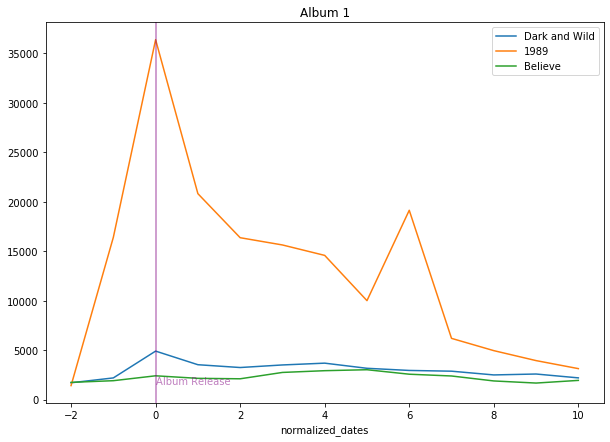

In [4]:
plot_albums('Album 1', None, (norm_bts1, 'Dark and Wild'), (norm_taylor1, '1989'), (norm_justin1, 'Believe'))

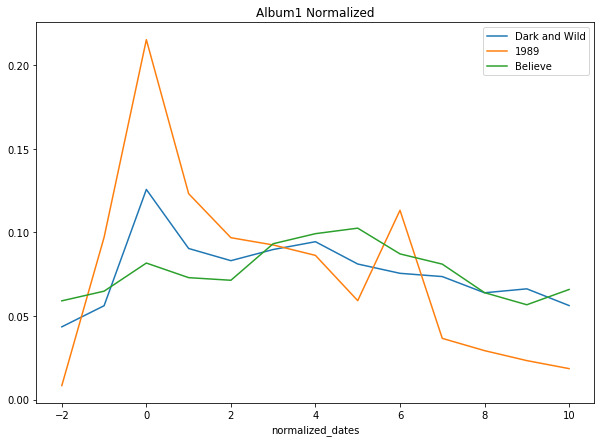

In [5]:
ax1 = (norm_bts1.groupby('normalized_dates').size() / len(norm_bts1)).plot(figsize=(10, 7), title='Album1 Normalized')
(norm_taylor1.groupby('normalized_dates').size() / len(norm_taylor1)).plot(figsize=(10, 7), ax=ax1)
(norm_justin1.groupby('normalized_dates').size() / len(norm_justin1)).plot(figsize=(10, 7), ax=ax1)
ax1.legend(['Dark and Wild', '1989', 'Believe']);

## Album 2

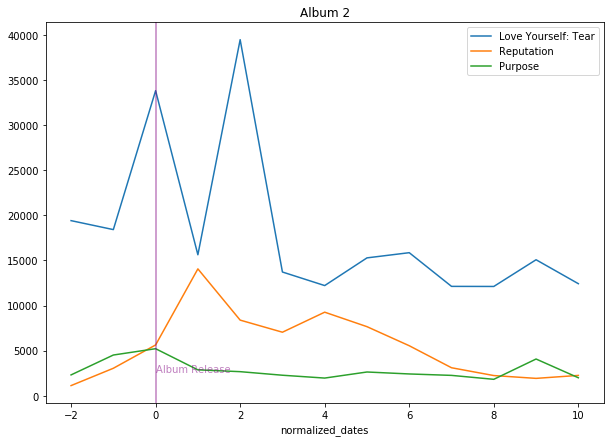

In [89]:
plot_albums('Album 2', None, (norm_bts2, 'Love Yourself: Tear'), (norm_taylor2, 'Reputation'), (norm_justin2, 'Purpose'))

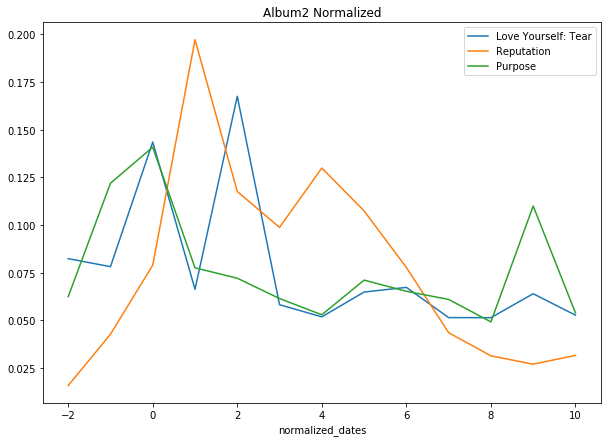

In [6]:
ax2 = (norm_bts2.groupby('normalized_dates').size() / len(norm_bts2)).plot(figsize=(10, 7), title='Album2 Normalized')
(norm_taylor2.groupby('normalized_dates').size() / len(norm_taylor2)).plot(figsize=(10, 7), ax=ax2)
(norm_justin2.groupby('normalized_dates').size() / len(norm_justin2)).plot(figsize=(10, 7), ax=ax2)
ax2.legend(['Love Yourself: Tear', 'Reputation', 'Purpose']);

## Album 3

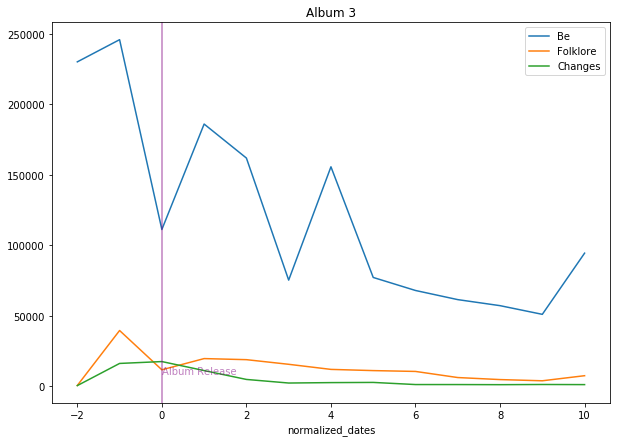

In [91]:
plot_albums('Album 3', None, (norm_bts3, 'Be'), (norm_taylor3, 'Folklore'), (norm_justin3, 'Changes'))

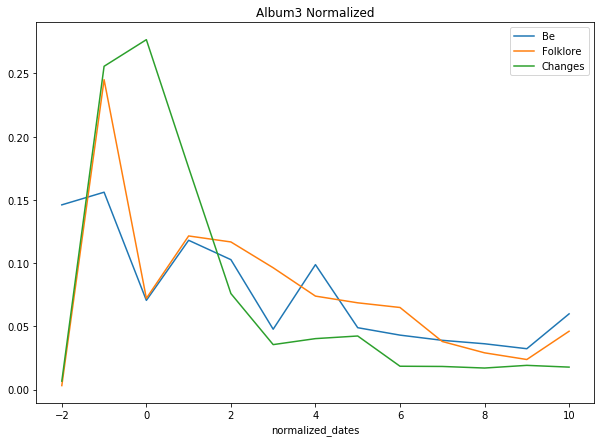

In [7]:
ax3 = (norm_bts3.groupby('normalized_dates').size() / len(norm_bts3)).plot(figsize=(10, 7), title='Album3 Normalized')
(norm_taylor3.groupby('normalized_dates').size() / len(norm_taylor3)).plot(figsize=(10, 7), ax=ax3)
(norm_justin3.groupby('normalized_dates').size() / len(norm_justin3)).plot(figsize=(10, 7), ax=ax3)
ax3.legend(['Be', 'Folklore', 'Changes']);

# Analysis
## Follower Stats
Idea: sheer numbers. Even though BTS has significantly less followers, those followers pull their weight with twitter collaboration and tweet/retweet like crazy <br><br>
JB 1:  24M<br>
JB 2:  69M<br>
JB 3:  110M<br><br>
TS 1:  46M<br>
TS 2:  85M<br>
TS 3:  86M<br><br>
BTS 1: 255K<br>
BTS 2: 11M<br>
BTS 3: 25M<br>

## Num Hashtags
Hypothesis: tweets with more hashtags get more engagement (retweets/likes). BTS has stronger collaboration because more hashtags in tweets (shows up more places on twitter?)

### Justin hashtags

In [99]:
justin1.hashtags.apply(lambda x: len(eval(x))).mean()

1.9768065781812048

In [93]:
justin2.hashtags.apply(lambda x: len(eval(x))).mean()

2.372918559658598

In [94]:
justin3.hashtags.apply(lambda x: len(eval(x))).mean()

1.8069045533113917

### Taylor hashtags

In [101]:
taylor1.hashtags.apply(lambda x: len(eval(x))).mean()

1.9723863082347872

In [95]:
taylor2.hashtags.apply(lambda x: len(eval(x))).mean()

2.1336573348863985

In [96]:
taylor3.hashtags.apply(lambda x: len(eval(x))).mean()

2.216227364846688

### BTS hashtags

In [100]:
bts1.hashtags.apply(lambda x: len(eval(x))).mean()

3.234565337763012

In [97]:
bts2.hashtags.apply(lambda x: len(eval(x))).mean()

3.7365996094120324

In [98]:
bts3.hashtags.apply(lambda x: len(eval(x))).mean()

3.7969576703532364

## Retweets
Ideas: compare retweet to like ratios across groups. Higher ratio == higher collaboration (more effort than liking)

In [79]:
bts3.groupby('username').retweets_count.sum().sort_values(ascending=False).head(20)

username
bts_bighit         8315095
bighitent          3848022
blackxagustd        862504
jimintoday__        831480
armyteamiid         680061
gma                 548104
fila_korea          513752
kimseokjingifs      436180
bts_history613      305788
weverseofficial     304956
soompi              246418
spotify             214352
bts_jp_official     213774
btsdailyinfo        196581
blackxagustdmp4     159076
serietv46           146467
columbiarecords     124106
only_moment__v      112164
7bts__update        110561
pandoramusic        109579
Name: retweets_count, dtype: int64

In [80]:
bts3.groupby('username').likes_count.sum().sort_values(ascending=False).head(20)

username
bts_bighit         37278495
bighitent          16846443
blackxagustd        3365855
armyteamiid         3265292
jimintoday__        2765465
fila_korea          2694114
gma                 2334265
bts_jp_official     1845865
weverseofficial     1702692
soompi              1658705
kimseokjingifs      1510871
bts_history613      1003858
spotify              994946
pandoramusic         923427
7bts__update         861994
bangtan_lab          859288
columbiarecords      710663
btsdailyinfo         701014
btsnewsbrasil        674508
serietv46            551286
Name: likes_count, dtype: int64

## a% makes b% tweets
Idea: larger value potentially means more organizers. Can study stats for "organizers" (avg retweets/likes for engagement)

In [11]:
bts3.username.value_counts().mean()

6.445221007864659

In [12]:
taylor3.username.value_counts().mean()

2.6812586157150644

In [13]:
justin3.username.value_counts().mean()

2.577658421960114

In [40]:
def percent_tweets(df, a):
    return (df.username.value_counts().iloc[:int(df.username.nunique() * a)]).sum() / len(df)

In [45]:
percent_tweets(bts3, 0.03)

0.3895745444753613

In [46]:
percent_tweets(taylor3, 0.03)

0.3300353314641335

In [47]:
percent_tweets(justin3, 0.03)

0.3222894419056188

## Num tweets / num users

In [51]:
len(bts2) / bts2.username.nunique()

3.4329436575713395

In [52]:
len(taylor2) / taylor2.username.nunique()

2.1345774627761425

In [53]:
len(justin2) / justin2.username.nunique()

2.068092563658629